# Mini Project 1

### Luis Pereda

In [8]:
# This is for ECE580: Intro to machine learning Spring 2020 in Duke
# This is translated to Python from show_chanWeights.m file provided by Prof. Li by 580 TAs

# import ext libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.misc import imread   # Make Sure you install the required packages like Pillow and scipy

def imgRead(fileName):
    """
    load the input image into a matrix
    :param fileName: name of the input file
    :return: a matrix of the input image
    Examples: imgIn = imgRead('lena.bmp')
    """
    imgIn = plt.imread(fileName)
    return imgIn


def imgShow(imgOut):
    """
    show the image saved in a matrix
    :param imgOut: a matrix containing the image to show
    :return: None
    """
    imgOut = np.uint8(imgOut)
    plt.figure(figsize=[20,20])
    plt.imshow(imgOut, cmap = 'gray')


def imgRecover(imgIn, blkSize, numSample):
    """
    Recover the input image from a small size samples
    :param imgIn: input image
    :param blkSize: block size
    :param numSample: how many samples in each block
    :return: recovered image
    """
    ##### Your Implementation here

    return None

"""
if __name__ == '__main__':
    a = imgRead('lena.bmp')
    print(np.shape(a))
    imgShow(a)
    print(a)
"""

"\nif __name__ == '__main__':\n    a = imgRead('lena.bmp')\n    print(np.shape(a))\n    imgShow(a)\n    print(a)\n"

In [9]:
fishing_boat = imgRead("fishing_boat.bmp")

In [10]:
nature = imgRead("nature.bmp")

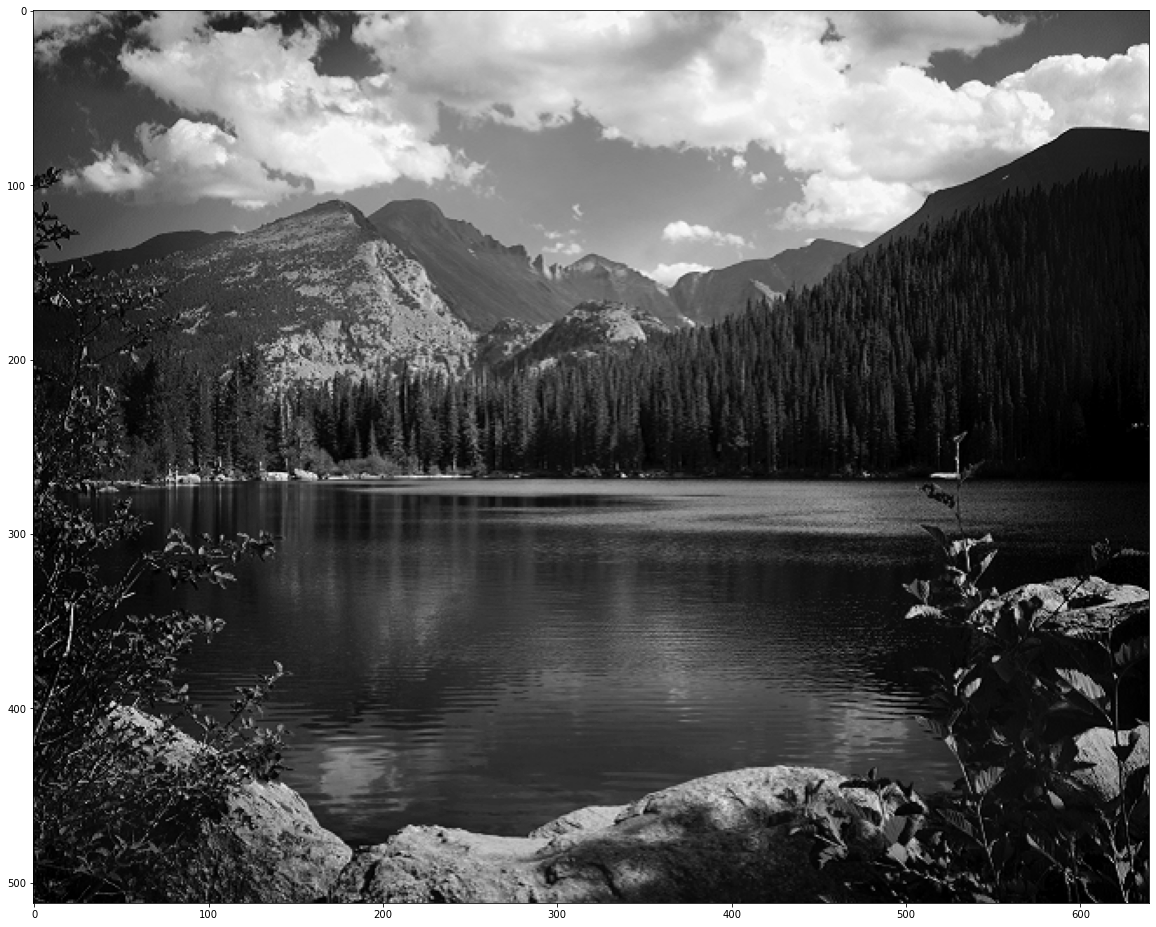

In [11]:
imgShow(nature)

In [12]:
(fishing_boat[1:3, :4])

array([[177, 176, 177, 178],
       [176, 176, 176, 178]], dtype=uint8)

In [13]:
import random

def sample_block(block, num_samples):
#     block = blocks[1]
    indices = np.linspace(0, np.prod(block.shape) - 1, np.prod(block.shape))
    random.shuffle(indices)
    
    kept_indices = indices[(len(indices) - num_samples):]
    kept_indices = [int(x) for x in kept_indices]
    
    indices = indices[0:(len(indices) - num_samples)]
    indices = [int(x) for x in indices]
    ret = block.flatten()
    ret[indices] = 0
    ret = ret.reshape([block.shape[0], block.shape[1]])
    
    
    return ret, np.sort(np.array(kept_indices))

In [14]:
def get_blocks_from_image(image, N):
    blocks = []
    for i in range(image.shape[0] // N):
        for j in range(image.shape[1] // N):
            blocks.append(image[(i * N):((i + 1) * N), (j * N):((j + 1) * N)])
    return np.array(blocks)

In [15]:
blocks = get_blocks_from_image(fishing_boat, 8)
blocks.shape

(600, 8, 8)

In [16]:
fishing_boat.shape

(200, 192)

In [17]:
x = fishing_boat.shape[1] / 8
x.is_integer()

True

In [18]:
# Get sampled image where num_samples are taken from each NXN block
def get_sampled_image(image, N, num_samples):
    blocks = get_blocks_from_image(image, N)
    
    block_count = 0
    new_blocks = np.ndarray(image.shape)
    col_reps = image.shape[1] / N
    
    if not col_reps.is_integer():
        print("Cannot split image into {} by {} blocks, select a new value N".format(N, N))
    
    else:
        col_reps = int(col_reps)
        for block in blocks:
            sample, trash = sample_block(block, num_samples)

            # For row in block
            for i in range(block.shape[0]):
                new_blocks[N * (block_count // col_reps) + i][N * (block_count % col_reps) : N * (block_count % col_reps + 1)] = sample[i]
            block_count += 1
        return new_blocks

In [19]:
new_blocks = get_sampled_image(nature, 16, 220)

In [20]:
list(np.subtract(nature, new_blocks))

[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 158.,   0.,   0.,
          0.,   0.,   0., 162.,   0., 159., 162.,   0.,   0.,   0.,   0.,
          0.,   0., 146.,   0.,   0.,   0.,   0.,   0., 142.,   0.,   0.,
          0.,   0., 112.,   0.,   0.,   0.,   0., 131.,   0.,   0., 126.,
          0.,   0.,   0., 115.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         67.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  66.,   0.,   0.,   0., 149.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 170.,   0.,   0.,   0., 168.,   0.,   0.,
        166.,   0.,   0.,   0.,   0.,   0.,   0., 136.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 139.,   0.,   0.,   0.,   0., 137.,
          0.,   0.,   0.,   0., 169.,   0.,   0.,   0.,   0.,   0.,   0.,
        184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.,   0.,
          0.,   0.,   0.,  44.,   0., 

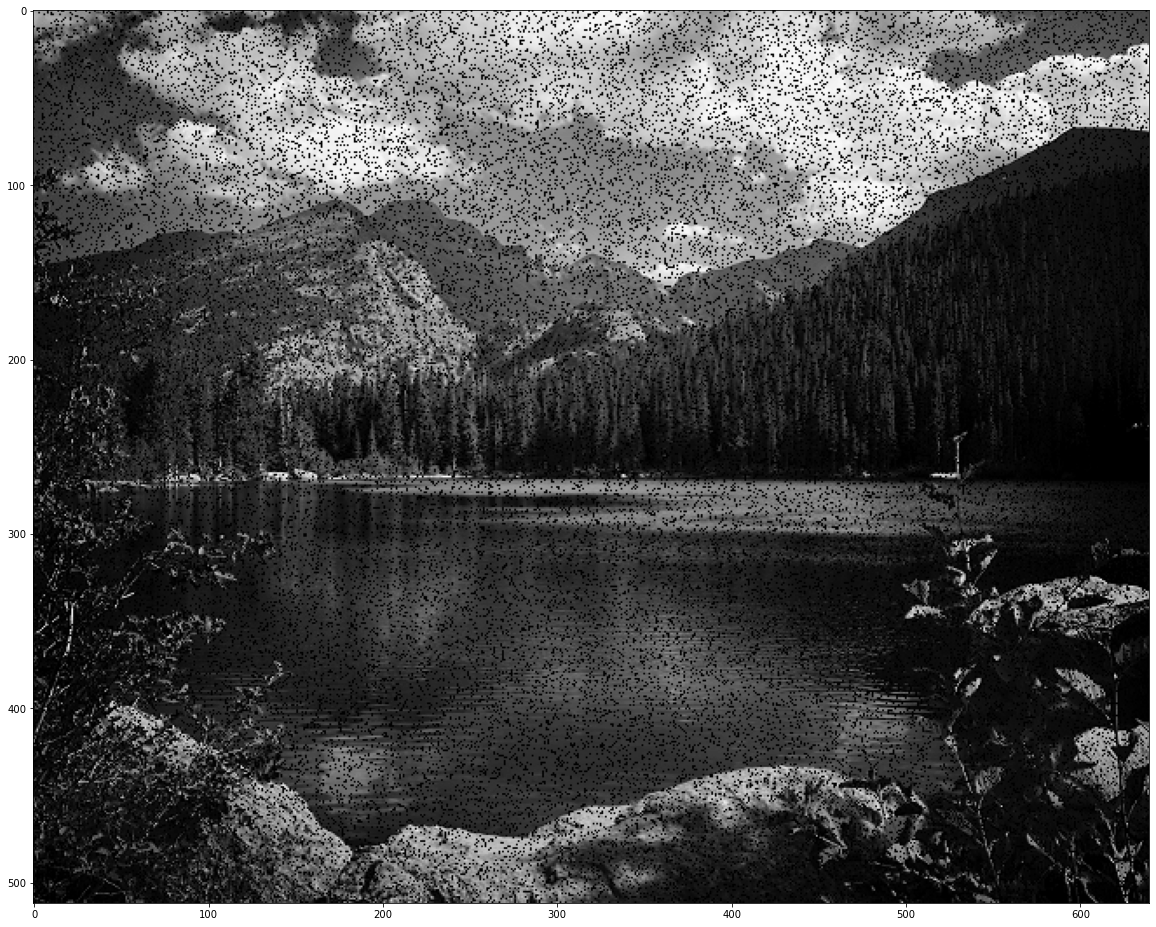

In [21]:
imgShow(new_blocks)

Up to this point have shown I can complete up to the first checkpoint: able to split image into NXN blocks and sample n samples from any of these blocks. 

In [22]:
from sklearn.linear_model import Lasso

In [23]:
def rasterize(mat):
    return mat.flatten()

In [24]:
def find_T_col(u, v, P, Q):
    T = np.ndarray([P,Q])
    for x in range(1, P + 1):
        for y in range(1, Q + 1):
            if u == 1:
                alpha = np.sqrt(1/P)
            else:
                alpha = np.sqrt(2/P)
            if v == 1: 
                beta = np.sqrt(1/Q)
            else:
                beta = np.sqrt(2/Q)
            term1 = np.cos(np.pi * (2 * x - 1) * (u - 1) / (2 * P))
            term2 = np.cos(np.pi * (2 * y - 1) * (v - 1) / (2 * Q))

            T[x-1][y-1] = alpha * beta * term1 * term2
    return rasterize(T)

In [25]:
def find_T_matrix(P, Q):
    T_mat = []
    for u in range(1, P + 1):
        for v in range(1, Q + 1):
            T_col = find_T_col(u, v, P, Q)
            T_mat.append(T_col)
    return np.transpose(np.array(T_mat).reshape([P ** 2, Q ** 2]))

In [26]:
T = find_T_matrix(8, 8)

In [27]:
fishing_boat_blocks = get_blocks_from_image(fishing_boat, 8)
block, trash = sample_block(fishing_boat_blocks[0], 10)
block = rasterize(block)

In [28]:
B = np.array([x for x in block if x != 0])
A = np.array([row for row, x in zip(T, block) if x != 0])

In [29]:
DC = A[:, 0]
A = A[:, 1:]

In [30]:
DCT_coef_predictor = Lasso(alpha = 1e-3)
DCT_coef_predictor.fit(X = A, y = B.flatten())

Lasso(alpha=0.001)

In [31]:
DC_term = [DCT_coef_predictor.intercept_ / DC[0]]

In [32]:
DCT_coefs = np.array(DC_term + list(DCT_coef_predictor.coef_))

In [33]:
len(DCT_coefs)

64

In [92]:

def find_DCT_coefs(block, N, lambda_choice, indices):
    T = find_T_matrix(N, N)
#     image_blocks = get_blocks_from_image(image, N)
#     block = sample_block(fishing_boat_blocks[0], num_samples)
#     block = rasterize(block)
    B = block
    A = T[indices]
    DC = A[:, 0]
    A = A[:, 1:]
    DCT_coef_predictor = Lasso(alpha = lambda_choice)
    DCT_coef_predictor.fit(X = A, y = B.flatten())
    DC_term = [DCT_coef_predictor.intercept_ / DC[0]]
    DCT_coefs = np.array(DC_term + list(DCT_coef_predictor.coef_))
    return DCT_coefs

Up to this point done with checkpoint 2: can estimate DCT for a single block 

In [89]:
import random

def find_training_and_test_set(block, S, indices):
    block = rasterize(block)
#     b = pd.DataFrame(np.array([x for x in block if x != 0]))
    b = pd.DataFrame(block[indices])
    indices = set(range(0, S))
    test_indices = set(random.sample(range(0, S), S // 6))
    train_indices = indices - test_indices
    
    train_values = b.iloc[np.sort(list(train_indices))]
    test_values = b.iloc[np.sort(list(test_indices))]
    return train_values, test_values, np.array(list(train_indices)), test_indices

In [90]:
def find_T_rows(test_indices, N):
    T = find_T_matrix(N, N)
    T = pd.DataFrame(T)
    T = T.iloc[np.sort(list(test_indices))]
    return T.to_numpy()

In [91]:
from sklearn.metrics import mean_squared_error as MSE
     
def find_lambda(block, num_samples, N, indices):
#     lambda_candidates = np.logspace(-6, 6, 60)
    lambda_candidates = [1]
    min_mse = 100000000
    
    for alpha_choice in lambda_candidates:
        train_values, test_values, train_indices, test_indices = find_training_and_test_set(block, num_samples, indices)
        train_arr = train_values.to_numpy().flatten()
        DCT_coefs = find_DCT_coefs(train_arr, N, alpha_choice, train_indices)
        T_rows = find_T_rows(test_indices, N)
        predictions = np.matmul(T_rows, DCT_coefs)
        mse = MSE(test_values, predictions)
        if(mse < min_mse):
            min_mse = mse
            ideal_lambda = alpha_choice
    return ideal_lambda

In [93]:
block, indices = sample_block(fishing_boat_blocks[0], 40)
lamb = find_lambda(block, 40, 8, indices)

In [96]:
def find_empty_indices(block):
    b = block.flatten()
    indices = [index for index, x in zip(range(len(b)), b) if x == 0]
    return indices

In [44]:
empties = find_empty_indices(block)

In [45]:
block = rasterize(block)
T_rows = find_T_rows(find_empty_indices(block), 8)
reconstructed_pixels = np.matmul(T_rows, DCT_coefs)

In [46]:
reconstructed_block = pd.DataFrame(block)
reconstructed_block.iloc[empties] = reconstructed_pixels
reconstructed_block = reconstructed_block.to_numpy().reshape([8, 8])

In [100]:
# NxN block 
def reconstruct_block(block, lamb, N, indices):
    block = rasterize(block)
#     b = np.array([x for x in block if x != 0])
    b = block[indices]
    DCT_coefs = find_DCT_coefs(b, N, lamb, indices)
    empties = find_empty_indices(block)
    
    T_rows = find_T_rows(empties, N)
    reconstructed_pixels = np.matmul(T_rows, DCT_coefs)
    
    reconstructed_block = pd.DataFrame(block)
    reconstructed_block.iloc[empties] = reconstructed_pixels
    reconstructed_block = reconstructed_block.to_numpy().reshape([N, N])
    
    return reconstructed_block

In [101]:
block, indices = sample_block(fishing_boat_blocks[0], 40)
lamb = find_lambda(block, 40, 8, indices)
new = reconstruct_block(block, lamb, 8, indices)

At this point able to reconstruct a block using cross-validation to find a lambda for LASSO regression

In [102]:
def reconstruct_image(image, N, num_samples):
    image_blocks = get_blocks_from_image(image, N)
    reconstructed_blocks = []
    
    for image_block in image_blocks:
        block, indices = sample_block(image_block, num_samples)
        lamb = find_lambda(block, num_samples, N, indices)
        reconstructed = reconstruct_block(block, lamb, N, indices)
        reconstructed_blocks.append(reconstructed)
    print(np.prod([image.shape[0] // N, image.shape[1] // N]))
    reconstructed_blocks = np.array(reconstructed_blocks).reshape([np.prod([image.shape[0] // N, image.shape[1] // N]) , N, N])
    
    block_count = 0
    new_blocks = np.ndarray(image.shape)
    col_reps = image.shape[1] / N

    col_reps = int(col_reps)
    for block in reconstructed_blocks:

        # For row in block
        for i in range(block.shape[0]):
            new_blocks[N * (block_count // col_reps) + i][N * (block_count % col_reps) : N * (block_count % col_reps + 1)] = block[i]
        block_count += 1
    return new_blocks

In [104]:
blocks = get_blocks_from_image(nature, 16)
count = 0
for block in blocks:
    count += 1
    lamb = find_lambda(block, 200, 16, np.arange(200))

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
nature_reconstructed_200 = reconstruct_image(nature, 16, 200)

In [61]:
block.flatten()[np.arange(200)]

array([186, 184, 188, 189, 192, 198, 202, 204, 209, 219, 220, 223, 211,
       211, 211, 213, 184, 185, 188, 187, 189, 196, 198, 203, 206, 206,
       210, 212, 204, 205, 207, 208, 191, 187, 189, 187, 187, 191, 198,
       197, 201, 201, 205, 205, 205, 203, 203, 205, 204, 197, 199, 200,
       199, 197, 201, 202, 200, 204, 199, 201, 202, 201, 204, 204,  31,
        43,  22,  62,  90, 130, 153, 153, 203, 206, 209, 212, 216, 213,
       214, 214,  26,  25,  26,  24,  20,  15,  12,  12,  11,   0,  28,
        25,  63,  64,  96, 135,  28,  28,  26,  27,  27,  27,  25,  27,
        25,  27,  24,  25,  21,  20,  18,  13,  27,  29,  26,  27,  27,
        27,  27,  27,  27,  25,  27,  25,  26,  24,  25,  25,  27,  28,
        28,  26,  28,  26,  27,  27,  25,  26,  26,  26,  24,  24,  26,
        24,  28,  26,  26,  28,  26,  27,  27,  27,  25,  27,  24,  26,
        26,  25,  23,  24,  28,  28,  28,  26,  27,  25,  25,  27,  25,
        26,  26,  24,  26,  24,  25,  23,  26,  27,  27,  26,  2

In [57]:
np.arange(200)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [53]:
a, b, c = find_training_and_test_set(blocks[558], 30, np.arange(30))

In [ ]:
blocks[558]

In [ ]:
blocks[560]

In [ ]:
nature_reconstructed_150 = reconstruct_image(nature, 16, 150)

In [ ]:
nature_reconstructed_100 = reconstruct_image(nature, 16, 100)

In [ ]:
nature_reconstructed_50 = reconstruct_image(nature, 16, 50)

In [105]:
fishing_boat_reconstructed_10 = reconstruct_image(fishing_boat, 8, 10)

600


In [ ]:
fishing_boat_reconstructed_20 = reconstruct_image(fishing_boat, 8, 20)

In [ ]:
fishing_boat_reconstructed_30 = reconstruct_image(fishing_boat, 8, 30)

In [ ]:
fishing_boat_reconstructed_40 = reconstruct_image(fishing_boat, 8, 40)

In [ ]:
fishing_boat_reconstructed_50 = reconstruct_image(fishing_boat, 8, 50)